In [1]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

from sklearn import svm

from sklearn import datasets, metrics, neighbors
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

from sklearn.model_selection import cross_validate, cross_val_score, train_test_split, GridSearchCV

[scikit classifier comparison example](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#classifier-comparison)

In [2]:
# datasets.load_breast_cancer?

In [3]:
X, y = datasets.load_breast_cancer(return_X_y=True, as_frame=True)

In [4]:
X.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
y.iloc[141]

0

In [6]:
np.unique(y, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

In [7]:
y.unique()

array([0, 1])

In [8]:
X.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

## Chose appropriate metrics
[scikit multiple metric evaluation](https://scikit-learn.org/stable/modules/cross_validation.html#the-cross-validate-function-and-multiple-metric-evaluation)   
[scikit model evaluation score](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules)   
In this case, which is better? Accuracy, Precision or **Recall**?

[scikit recall](https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-and-f-measures)

In [10]:
# a list of metrics
scoring = ['accuracy', 'precision', "recall"]

## Cross validate to different subsets of the data.

### Naive Bayes

In [11]:
clf = GaussianNB()
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [12]:
clf.get_params()

{'priors': None, 'var_smoothing': 1e-09}

The cross_validate function differs from cross_val_score in two ways:

    It allows specifying multiple metrics for evaluation.

    It returns a dict containing fit-times, score-times (and optionally training scores as well as fitted estimators) in addition to the test score.


In [13]:
scores = cross_validate(clf, X, y, cv=5, scoring=scoring, return_train_score=True, return_estimator=True)

In [14]:
scores

{'fit_time': array([0.00399232, 0.00299168, 0.00199485, 0.00309706, 0.00199509]),
 'score_time': array([0.00706244, 0.00398803, 0.00406981, 0.00598431, 0.00505185]),
 'estimator': [GaussianNB(),
  GaussianNB(),
  GaussianNB(),
  GaussianNB(),
  GaussianNB()],
 'test_accuracy': array([0.92105263, 0.92105263, 0.94736842, 0.94736842, 0.95575221]),
 'train_accuracy': array([0.93846154, 0.94945055, 0.93846154, 0.94065934, 0.93859649]),
 'test_precision': array([0.94285714, 0.8974359 , 0.93421053, 0.94594595, 0.95833333]),
 'train_precision': array([0.93581081, 0.94576271, 0.93265993, 0.93877551, 0.93877551]),
 'test_recall': array([0.92957746, 0.98591549, 0.98611111, 0.97222222, 0.97183099]),
 'train_recall': array([0.96853147, 0.97552448, 0.97192982, 0.96842105, 0.96503497])}

In [15]:
scores["test_recall"].mean(), scores["test_recall"].std()

(0.9691314553990612, 0.02074305234355537)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        83
           1       0.94      0.95      0.95       145

    accuracy                           0.93       228
   macro avg       0.93      0.92      0.92       228
weighted avg       0.93      0.93      0.93       228



### K nearest N

In [17]:
clf = KNeighborsClassifier()
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [18]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [19]:
scores = cross_validate(clf, X, y, cv=5, scoring=scoring)
scores

{'fit_time': array([0.00299168, 0.00207663, 0.00099802, 0.00199604, 0.00199556]),
 'score_time': array([0.01207972, 0.01206112, 0.01413393, 0.0130434 , 0.01108766]),
 'test_accuracy': array([0.88596491, 0.93859649, 0.93859649, 0.94736842, 0.92920354]),
 'test_precision': array([0.8625    , 0.93243243, 0.94520548, 0.94594595, 0.95652174]),
 'test_recall': array([0.97183099, 0.97183099, 0.95833333, 0.97222222, 0.92957746])}

In [20]:
scores["test_recall"].mean(), scores["test_recall"].std()

(0.9607589984350549, 0.016460590541357182)

### Logistic Regression

In [21]:
clf = LogisticRegression(random_state=0, max_iter=3000)
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [22]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 3000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [23]:
scores = cross_validate(clf, X, y, cv=5, scoring=scoring)

In [24]:
scores

{'fit_time': array([0.59322286, 0.53700972, 0.45707345, 0.50430322, 0.57990146]),
 'score_time': array([0.00410056, 0.00514746, 0.00503206, 0.00399065, 0.00598288]),
 'test_accuracy': array([0.93859649, 0.94736842, 0.98245614, 0.92982456, 0.96460177]),
 'test_precision': array([0.91025641, 0.94520548, 0.98611111, 0.94444444, 0.98550725]),
 'test_recall': array([1.        , 0.97183099, 0.98611111, 0.94444444, 0.95774648])}

In [25]:
scores["test_recall"].mean(), scores["test_recall"].std()

(0.9720266040688574, 0.01972622614771923)

In [26]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 3000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Just copy paste and keep what you need for a dictionary

In [27]:
parameter_grid = {'C': [0.3, 1.0, 10],
 'max_iter': [8000],
 'penalty': ['l2'],
 'random_state':[0],
 'solver': ['lbfgs', 'newton-cg', 'sag', 'liblinear', 'saga'] ,
 'tol': [0.0001],
 'warm_start': [False]}

In [28]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

In [29]:
clf = LogisticRegression()

In [30]:
GridSearchCV(LogisticRegression(), parameter_grid)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.3, 1.0, 10], 'max_iter': [8000],
                         'penalty': ['l2'], 'random_state': [0],
                         'solver': ['lbfgs', 'newton-cg', 'sag', 'liblinear',
                                    'saga'],
                         'tol': [0.0001], 'warm_start': [False]})

In [31]:
clf = GridSearchCV(clf, parameter_grid)
clf.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.3, 1.0, 10], 'max_iter': [8000],
                         'penalty': ['l2'], 'random_state': [0],
                         'solver': ['lbfgs', 'newton-cg', 'sag', 'liblinear',
                                    'saga'],
                         'tol': [0.0001], 'warm_start': [False]})

In [32]:
scores = cross_validate(clf, X, y, cv=5, scoring=scoring)
scores



scores["test_recall"].mean(), scores["test_recall"].std()

(0.9691705790297339, 0.01047943810960808)

### Support Vector Machine with Grid Search

In [33]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

svc = svm.SVC()

clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)


sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [34]:
scores = cross_validate(clf, X, y, cv=5, scoring=scoring)
scores



scores["test_recall"].mean(), scores["test_recall"].std()

(0.966392801251956, 0.014173557815860133)

Confusion matrix, without normalization
[[ 80   3]
 [  3 142]]
Normalized confusion matrix
[[0.96385542 0.03614458]
 [0.02068966 0.97931034]]


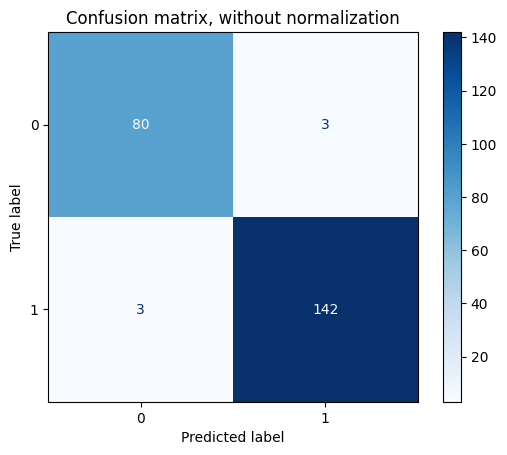

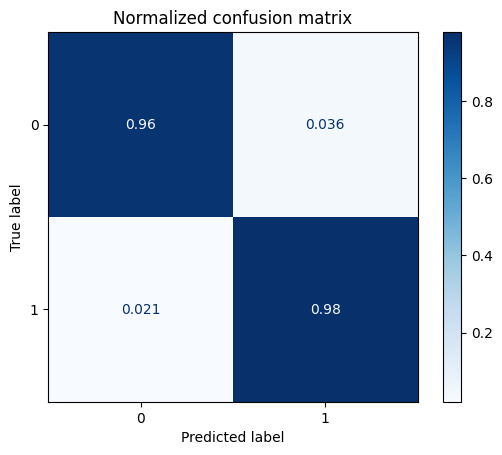

In [35]:
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        # display_labels=y,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### ROC curve   
fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate)  
TPR = TP/P  versus FPR = FP/N

[scikit roc curve](https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics)

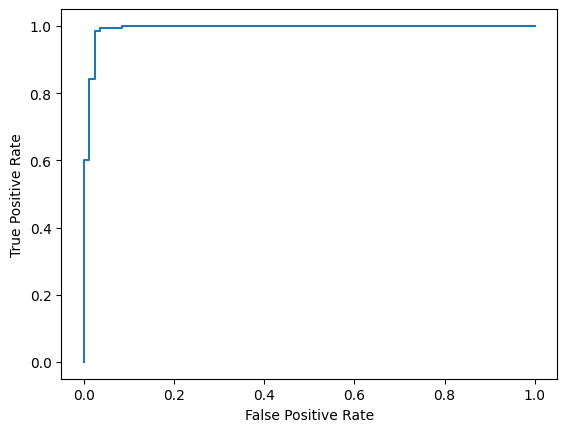

In [36]:
clf = LogisticRegression()
clf = GridSearchCV(clf, parameter_grid)
clf.fit(X_train, y_train)

y_score = clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

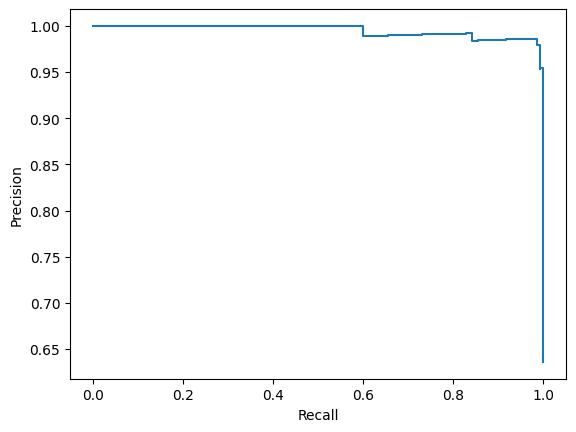

In [37]:
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

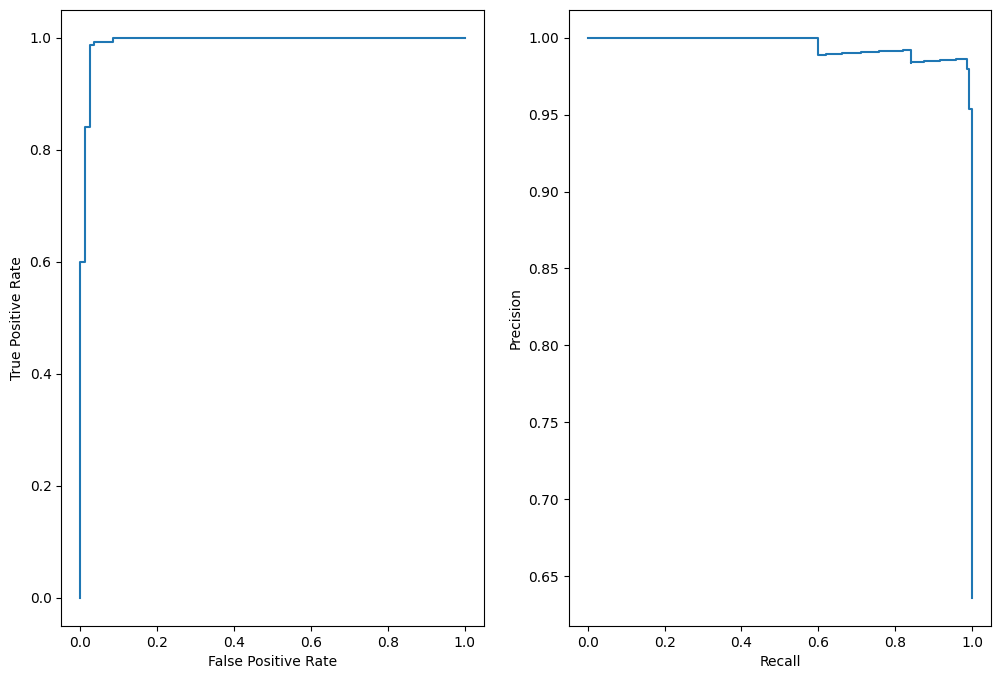

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

[Combine/Stack estimators](https://scikit-learn.org/stable/auto_examples/ensemble/plot_stack_predictors.html?highlight=stacking%20models#combine-predictors-using-stacking)

[stacked_generalization](https://scikit-learn.org/stable/modules/ensemble.html?highlight=stacking%20classifiers#stacked-generalization)

In [39]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor

classifiers = [('logistic_regression', LogisticRegression(max_iter=5000)),
              ('naive_bayes', GaussianNB()),
              ('knr', KNeighborsClassifier(n_neighbors=20,
                                          metric='euclidean'))]

In [40]:
StackingClassifier?

Object `StackingClassifier` not found.


In [41]:
from sklearn.ensemble import StackingClassifier

final_estimator = GridSearchCV(LogisticRegression(), parameter_grid)

final_clf = StackingClassifier(
    estimators=classifiers,
    final_estimator=final_estimator)

In [42]:
y_pred = final_clf.fit(X_train, y_train).predict(X_test)

In [43]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0])

In [44]:
metrics.recall_score(y_test, y_pred)
#(y_test, y_pred)

0.9793103448275862

In [45]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        83
           1       0.99      0.98      0.98       145

    accuracy                           0.98       228
   macro avg       0.98      0.98      0.98       228
weighted avg       0.98      0.98      0.98       228



In [46]:
scores = cross_validate(final_clf, X, y, cv=5, scoring=scoring)
scores

{'fit_time': array([2.87542748, 2.77498746, 3.20861673, 3.63877726, 3.87811184]),
 'score_time': array([0.01561856, 0.01562262, 0.0156188 , 0.        , 0.0156188 ]),
 'test_accuracy': array([0.93859649, 0.93859649, 0.96491228, 0.95614035, 0.97345133]),
 'test_precision': array([0.91025641, 0.92105263, 0.95945946, 0.95890411, 0.98571429]),
 'test_recall': array([1.        , 0.98591549, 0.98611111, 0.97222222, 0.97183099])}

In [47]:
scores["test_recall"].mean(), scores["test_recall"].std()

(0.9832159624413146, 0.010467600318116208)

In [48]:
metrics.recall_score?

Signature:
metrics.recall_score(
    y_true,
    y_pred,
    *,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
)
Docstring:
Compute the recall.

The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
true positives and ``fn`` the number of false negatives. The recall is
intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.

Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.

Parameters
----------
y_true : 1d array-like, or label indicator array / sparse matrix
    Ground truth (correct) target values.

y_pred : 1d array-like, or label indicator array / sparse matrix
    Estimated targets as returned by a classifier.

labels : array-like, default=None
    The set of labels to include when ``average != 'binary'``, and their
    order if ``average is None``. Labels present in the data can be
    excluded, for example to cal

https://www.superdatascience.com/blogs/the-ultimate-guide-to-artificial-neural-networks-ann

https://www.youtube.com/watch?v=WCUNPb-5EYI&list=PLVZqlMpoM6kaJX_2lLKjEhWI0NlqHfqzp

https://colah.github.io/posts/2015-08-Understanding-LSTMs/

https://www.youtube.com/watch?v=UANN2Eu6ZnM&t=298s

https://www.youtube.com/watch?v=68ABAU_V8qI

https://www.youtube.com/watch?v=Z8MEFI7ZJlA

https://scikit-learn-extra.readthedocs.io/en/stable/

https://koaning.io/

https://scikit-lego.readthedocs.io/en/latest/

https://colah.github.io/posts/2014-07-Conv-Nets-Modular/